### Predicting HDB Prices - XGBoost



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor


#### Load data

In [3]:
df = pd.read_csv('../data/train-test/data_sklearn_models.csv')

In [4]:
df.head()

,storey_range,resale_price,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,...,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd,poi_vector_average
0,2,12.449019,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.546558,-0.345484,-0.802967,-0.833389,-0.524994,-0.375705
1,0,12.524526,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.727997,-0.802967,-0.167970,-0.582020,0.258150
2,0,12.560244,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.172367,-0.804500,-0.802967,-0.899113,-0.565965,-0.375705
3,0,12.577636,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.881003,-0.802967,-0.296103,-0.738546,-0.133931
4,2,12.577636,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.804500,-0.802967,-0.044030,-0.637076,0.258150


#### Train Test Split the Data 

In [5]:
y_values = df['resale_price']
X_values = df.drop('resale_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

165052 41263
165052 41263
(165052, 47) (41263, 47)
(165052,) (41263,)


#### Train and Fit Baseline XGBoost Model

In [6]:
model = XGBRegressor()


In [7]:
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:
y_pred = model.predict(X_train)

# R2 Score
r2 = r2_score(y_train, y_pred)
print("Training R2 Score:", round(r2, 5))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)
print("Training MAE Score:", round(mae, 5))

# Mean Relative Error (MRE)
mre = np.mean(np.abs((y_train - y_pred) / y_train))
print("Training MRE Score:", round(mre, 5))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Training RMSE Score:", round(rmse, 5))

# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_train - y_pred) / y_train)) * 100
print("Training MAPE Score:", round(mape, 5))

Training R2 Score: 0.96195
Training MAE Score: 0.04906
Training MRE Score: 0.00377
Training RMSE Score: 0.06432
Training MAPE Score: 0.37696


In [9]:
train_scores = {'Set': 'Train', 'R2': r2, 'MAE': mae, 'MRE': mre, 'RMSE': rmse, 'MAPE': mape}

In [10]:
y_pred = model.predict(X_test)

# R2 Score
r2 = r2_score(y_test, y_pred)
print("Testing R2 Score:", round(r2, 5))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Testing MAE Score:", round(mae, 5))

# Mean Relative Error (MRE)
mre = np.mean(np.abs((y_test - y_pred) / y_test))
print("Testing MRE Score:", round(mre, 5))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Testing RMSE Score:", round(rmse, 5))

# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Testing MAPE Score:", round(mape, 5))

Testing R2 Score: 0.95795
Testing MAE Score: 0.0512
Testing MRE Score: 0.00393
Testing RMSE Score: 0.06738
Testing MAPE Score: 0.39327


In [11]:
test_scores = {'Set': 'Test', 'R2': r2, 'MAE': mae, 'MRE': mre, 'RMSE': rmse, 'MAPE': mape}

In [12]:
scores = [train_scores, test_scores]
scores_table = pd.DataFrame(scores)
scores_table.head()

,Set,R2,MAE,MRE,RMSE,MAPE
0,Train,0.961955,0.049058,0.003770,0.064317,0.376959
1,Test,0.957951,0.051198,0.003933,0.067378,0.393274


#### Improving on the Baseline Score with Hyperparameter Tuning 

In [13]:
xgb_reg = XGBRegressor()

param_grid = {
    'n_estimators': [75, 100, 125],
    'learning_rate': [0.4, 0.3, 0.2],
    'max_depth': [5, 6, 7],
    'min_child_weight': [0.5, 1, 2],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.75, 1]
}

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=0.75; total time=   4.2s
[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=0.75; total time=   4.3s
[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=1; total time=   4.2s
[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=1; total time=   4.3s
[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=1; total time=   4.4s
[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=0.75; total time=   4.4s
[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=0.75; total time=   4.5s
[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=0.75; total time=   4.6s
[CV] END gamma=0,

In [14]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=0.5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=125, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
param_info = [
    {'model': 'benchmark', 'n_estimators': None, 'learning_rate': None, 'max_depth': None, 'min_child_weight': None, 'gamma': None, 'subsample': None},
    {'model': 'best params', **grid_search.best_params_}
]

param_table = pd.DataFrame(param_info)
param_table.head()

,model,n_estimators,learning_rate,max_depth,min_child_weight,gamma,subsample
0,benchmark,NaN,NaN,NaN,NaN,NaN,NaN
1,best params,125.0,0.4,7.0,0.5,0.0,1.0


In [16]:
y_pred = grid_search.best_estimator_.predict(X_train)

# R2 Score
r2 = r2_score(y_train, y_pred)
print("Training R2 Score:", round(r2, 5))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)
print("Training MAE Score:", round(mae, 5))

# Mean Relative Error (MRE)
mre = np.mean(np.abs((y_train - y_pred) / y_train))
print("Training MRE Score:", round(mre, 5))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Training RMSE Score:", round(rmse, 5))

# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_train - y_pred) / y_train)) * 100
print("Training MAPE Score:", round(mape, 5))

Training R2 Score: 0.97449
Training MAE Score: 0.04005
Training MRE Score: 0.00308
Training RMSE Score: 0.05267
Training MAPE Score: 0.30797


In [17]:
train_scores = {'Set': 'Train', 'R2': r2, 'MAE': mae, 'MRE': mre, 'RMSE': rmse, 'MAPE': mape}

In [18]:
y_pred = grid_search.best_estimator_.predict(X_test)

# R2 Score
r2 = r2_score(y_test, y_pred)
print("Testing R2 Score:", round(r2, 5))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Testing MAE Score:", round(mae, 5))

# Mean Relative Error (MRE)
mre = np.mean(np.abs((y_test - y_pred) / y_test))
print("Testing MRE Score:", round(mre, 5))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Testing RMSE Score:", round(rmse, 5))

# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Testing MAPE Score:", round(mape, 5))

Testing R2 Score: 0.96716
Testing MAE Score: 0.04499
Testing MRE Score: 0.00346
Testing RMSE Score: 0.05954
Testing MAPE Score: 0.34574


In [19]:
test_scores = {'Set': 'Test', 'R2': r2, 'MAE': mae, 'MRE': mre, 'RMSE': rmse, 'MAPE': mape}

In [20]:
scores = [train_scores, test_scores]
scores_table = pd.DataFrame(scores)
scores_table.head()

,Set,R2,MAE,MRE,RMSE,MAPE
0,Train,0.974488,0.040050,0.003080,0.052669,0.307968
1,Test,0.967161,0.044987,0.003457,0.059544,0.345738


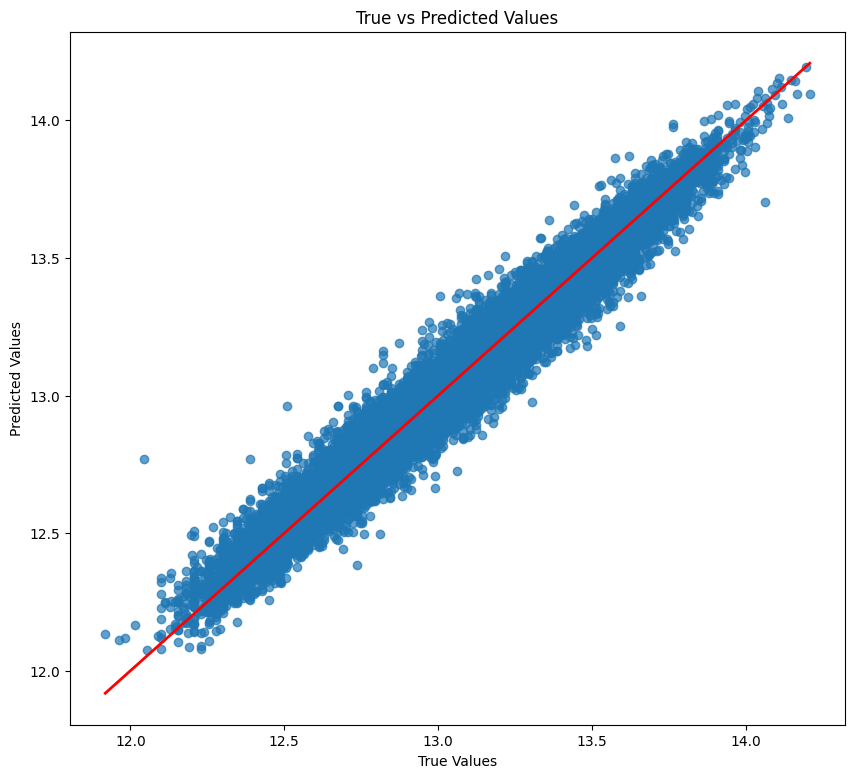

In [21]:
plt.figure(figsize=(10, 9))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

**Evaluation**
- There is a noticeable pattern where the predicted values tend to be higher than the true values below 13.0, similar around the 13.0 to 13.5 range, and lower than the true values after the 13.5 amount. 
- This suggests a potential overestimation by the model for lower values and an underestimation for higher values.






#### Feature Importance

Gain: This is useful when you want to understand the relative importance of each feature in terms of the improvement they bring to the model's predictive accuracy. It's particularly helpful when you want to understand which features are most informative in terms of splitting the data.

Weight: This is useful when you want to understand which features are more frequently used for splitting in the trees. It gives you an idea of how often each feature is considered during the model's training.

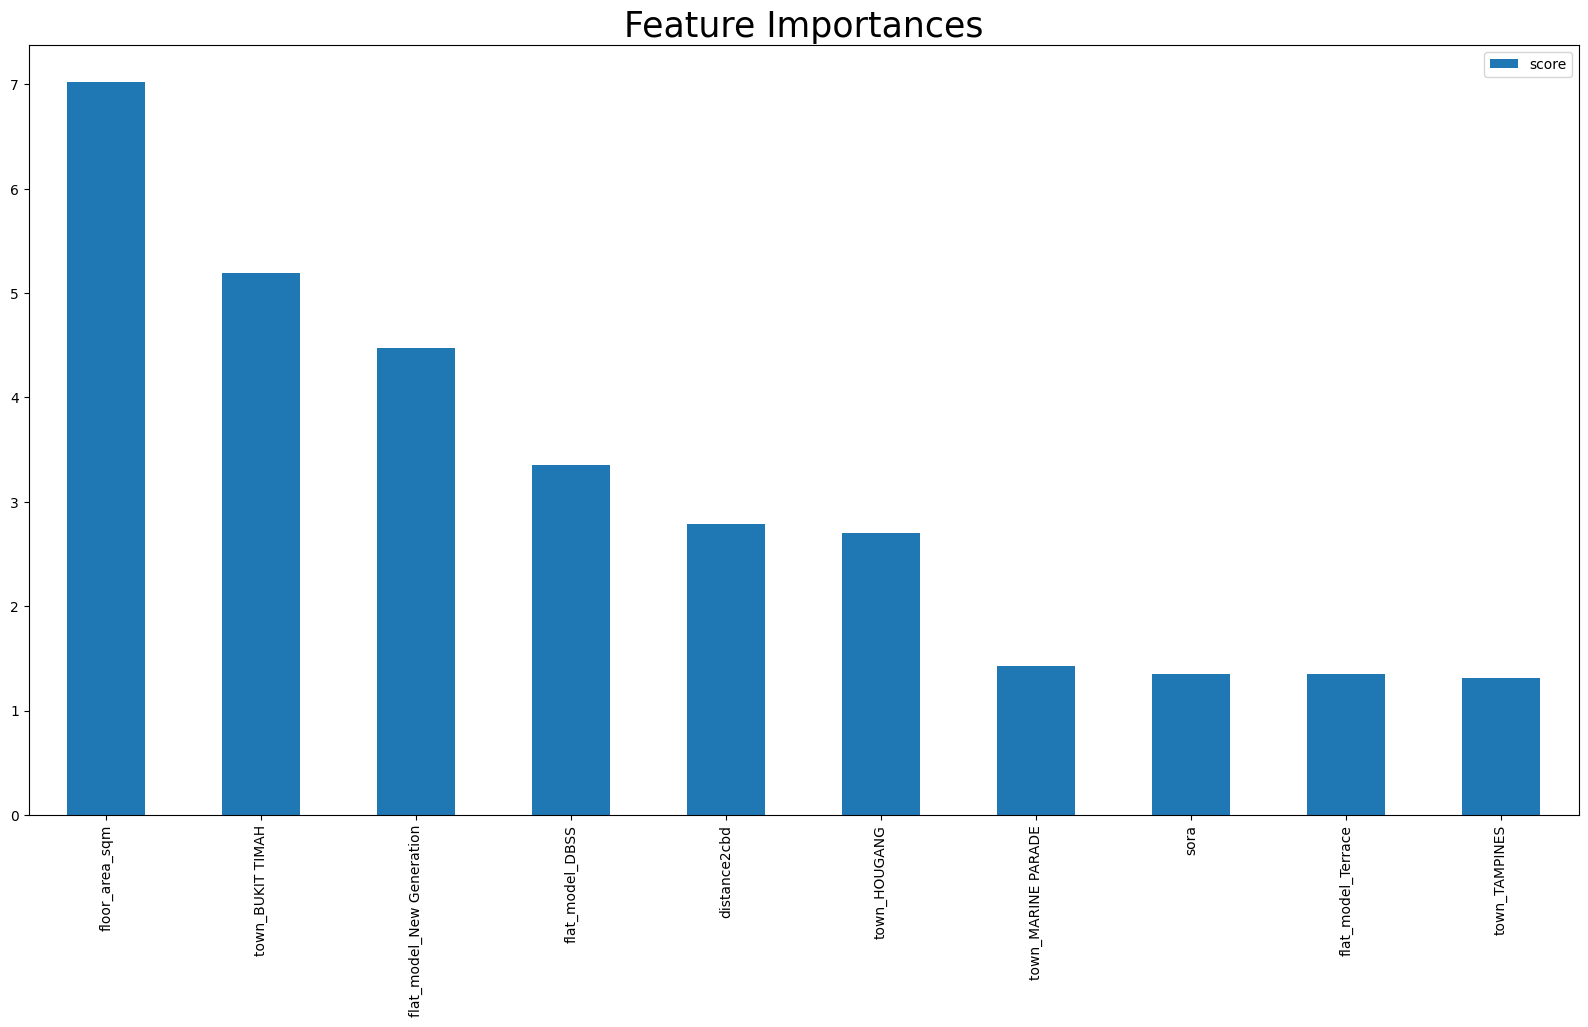

In [35]:
importance_scores = grid_search.best_estimator_.get_booster().get_score(importance_type='gain')

keys = list(importance_scores.keys())
values = list(importance_scores.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by="score", ascending=True)
data.nlargest(10, columns="score").plot(kind='bar', figsize = (20,10))
plt.title('Feature Importances', fontsize=25)
plt.show()


### Predict 2024 resale prices

In [37]:
df_2024 = pd.read_csv('../data/train-test/2024-data.csv')
df_2024.head()

,flat_type,block,street_name,storey_range,lease_commence_date,resale_price,address,latitude,longitude,nearest_mrt_station,...,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd,poi_vector_average
0,1,116,ANG MO KIO AVE 4,2,1978,12.570716,116 ANG MO KIO AVE 4,1.373346,103.836459,Yio Chu Kang MRT Station (1327.32m),...,0,0,0,0,-2.211786,-1.607778,2.175147,-0.970227,-0.563772,-0.375705
1,1,510,ANG MO KIO AVE 8,1,1980,12.683858,510 ANG MO KIO AVE 8,1.373401,103.849073,Ang Mo Kio MRT Station (376.66m),...,0,0,0,0,-2.211786,-1.448652,2.175147,-0.345136,-0.596351,-0.340607
2,2,308B,ANG MO KIO AVE 1,0,2012,13.161584,308B ANG MO KIO AVE 1,1.365266,103.844538,Ang Mo Kio MRT Station (758.33m),...,0,0,0,0,-1.130791,1.012438,2.175147,-0.810390,-0.795211,0.634423
3,2,308B,ANG MO KIO AVE 1,8,2012,13.384728,308B ANG MO KIO AVE 1,1.365266,103.844538,Ang Mo Kio MRT Station (758.33m),...,0,0,0,0,-1.130791,1.012438,2.175147,-0.810390,-0.795211,0.634423
4,2,223,ANG MO KIO AVE 1,1,1978,12.747815,223 ANG MO KIO AVE 1,1.366048,103.838123,Ang Mo Kio MRT Station (1335.16m),...,0,0,0,0,-1.255521,-1.639909,2.175147,-0.940479,-0.753589,0.053899


In [46]:
df_2024 = df_2024[df.columns].head()

In [47]:
y_2024 = df_2024['resale_price']
X_2024 = df_2024.drop('resale_price', axis=1)

In [48]:
y_pred_2024 = grid_search.best_estimator_.predict(X_2024)

# R2 Score
r2_2024 = r2_score(y_2024, y_pred_2024)
print("2024 Data - R2 Score:", round(r2_2024, 5))

# Mean Absolute Error (MAE)
mae_2024 = mean_absolute_error(y_2024, y_pred_2024)
print("2024 Data - MAE Score:", round(mae_2024, 5))

# Mean Relative Error (MRE)
mre_2024 = np.mean(np.abs((y_2024 - y_pred_2024) / y_2024))
print("2024 Data - MRE Score:", round(mre_2024, 5))

# Root Mean Squared Error (RMSE)
rmse_2024 = np.sqrt(mean_squared_error(y_2024, y_pred_2024))
print("2024 Data - RMSE Score:", round(rmse_2024, 5))

# Mean Absolute Percentage Error
mape_2024 = np.mean(np.abs((y_2024 - y_pred_2024) / y_2024)) * 100
print("2024 Data - MAPE Score:", round(mape_2024, 5))

2024 Data - R2 Score: 0.92115
2024 Data - MAE Score: 0.07032
2024 Data - MRE Score: 0.00546
2024 Data - RMSE Score: 0.08711
2024 Data - MAPE Score: 0.54623


In [49]:
scores_data_2024 = {'Set': '2024', 'R2': r2_2024, 'MAE': mae_2024, 'MRE': mre_2024, 'RMSE': rmse_2024, 'MAPE': mape_2024}

In [50]:
scores = [train_scores, test_scores, scores_data_2024]
scores_table = pd.DataFrame(scores)
scores_table.head()

,Set,R2,MAE,MRE,RMSE,MAPE
0,Train,0.974488,0.040050,0.003080,0.052669,0.307968
1,Test,0.967161,0.044987,0.003457,0.059544,0.345738
2,2024,0.921155,0.070316,0.005462,0.087111,0.546228
